In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
francia=pd.read_excel("/content/Prueba LTV prediction (3).xlsx",sheet_name="France")  #pon la ubicacion del path o archibo
usa=pd.read_excel("/content/Prueba LTV prediction (3).xlsx",sheet_name="USA") #pon la ubicacion del path o archibo
usa.head(1)
#si el notebook se tuesta recarga la pagina y craga cada bloque por orden

,Date,D1 LTV USD,D60 estimated LTV USD,Incremental,CPI EUR,Profit per Paid User D60 EUR,Total Profit Paid Users D60 EUR,Total Profit Organic Users D60 EUR,Total Installs (AdMob),Google Ads Installs,Profit D60 EUR
0,2021-12-26,0.638,1.3398,2.1,0.71,0.469024,15.946816,8.253168,41.0,34.0,24.199984


In [16]:
#renombramos y calculamos x columnas
francia=francia.set_axis(["Date","valor_que_ingresamos_por_usuario_en_69_d","estimated_Life_Time_Value","cuánto_creemos_que_crecerá_el_LTV ","Coste_por_Descarga","Profit_per_Paid_User","Total_Profit_Paid_Users ","Total_Profit_Organic_Users","Total_Installs","Instalaciones_por_publi","Profit_total"], axis="columns")
francia2=francia.assign(instalaciones_organicas= lambda dataset : dataset.Total_Installs- dataset.Instalaciones_por_publi)
francia2=francia2.assign(ingreso_instalaciones_organicas= lambda dataset : dataset.valor_que_ingresamos_por_usuario_en_69_d*dataset.instalaciones_organicas)
francia2=francia2.assign(ingreso_instalaciones_publicidad= lambda dataset : dataset.valor_que_ingresamos_por_usuario_en_69_d*dataset.Instalaciones_por_publi)
francia=francia2.assign(pago_por_descarga= lambda dataset : dataset.Coste_por_Descarga*dataset.Instalaciones_por_publi)
francia.head(1)

,Date,valor_que_ingresamos_por_usuario_en_69_d,estimated_Life_Time_Value,cuánto_creemos_que_crecerá_el_LTV,Coste_por_Descarga,Profit_per_Paid_User,Total_Profit_Paid_Users,Total_Profit_Organic_Users,Total_Installs,Instalaciones_por_publi,Profit_total,instalaciones_organicas,ingreso_instalaciones_organicas,ingreso_instalaciones_publicidad,pago_por_descarga
0,2021-12-26,0.193,0.4825,2.5,0.31,0.1146,8.2512,5.5198,85.0,72.0,13.771,13.0,2.509,13.896,22.32


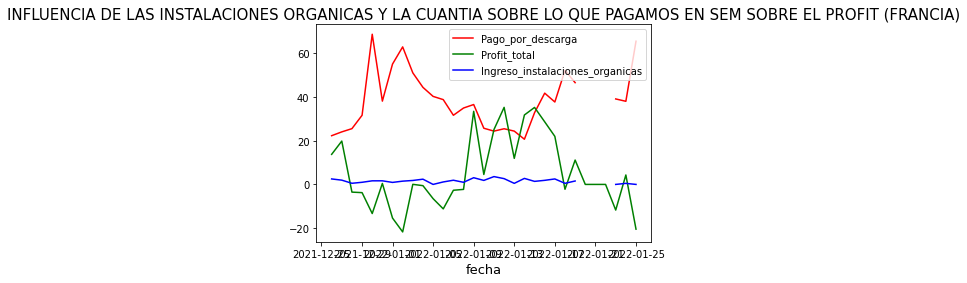

In [17]:
pago_por_descarga=francia["pago_por_descarga"]
Profit_total=francia["Profit_total"]
ingreso_instalaciones_organicas=francia["ingreso_instalaciones_organicas"]
ingreso_instalaciones_organicas=francia["ingreso_instalaciones_organicas"]
data=francia["Date"]
plt.plot(data, pago_por_descarga, label="Pago_por_descarga" ,color="r")
plt.plot(data, Profit_total, label="Profit_total",color="g")
plt.plot(data, ingreso_instalaciones_organicas, label="Ingreso_instalaciones_organicas", color="b")
plt.legend()
plt.title("INFLUENCIA DE LAS INSTALACIONES ORGANICAS Y LA CUANTIA SOBRE LO QUE PAGAMOS EN SEM SOBRE EL PROFIT (FRANCIA)",fontsize=15)
plt.xlabel("fecha",fontsize=13)
plt.show()

In [18]:
#renombramos y calculamos x columnas
usa=usa.set_axis(["Date","valor_que_ingresamos_por_usuario_en_69_d","estimated_Life_Time_Value","cuánto_creemos_que_crecerá_el_LTV ","Coste_por_Descarga","Profit_per_Paid_User","Total_Profit_Paid_Users ","Total_Profit_Organic_Users","Total_Installs","Instalaciones_por_publi","Profit_total"], axis="columns")
usa2=usa.assign(instalaciones_organicas= lambda dataset : dataset.Total_Installs- dataset.Instalaciones_por_publi)
usa2=usa2.assign(ingreso_instalaciones_organicas= lambda dataset : dataset.valor_que_ingresamos_por_usuario_en_69_d*dataset.instalaciones_organicas)
usa2=usa2.assign(ingreso_instalaciones_publicidad= lambda dataset : dataset.valor_que_ingresamos_por_usuario_en_69_d*dataset.Instalaciones_por_publi)
usa=usa2.assign(pago_por_descarga= lambda dataset : dataset.Coste_por_Descarga*dataset.Instalaciones_por_publi)
usa.head(1)

,Date,valor_que_ingresamos_por_usuario_en_69_d,estimated_Life_Time_Value,cuánto_creemos_que_crecerá_el_LTV,Coste_por_Descarga,Profit_per_Paid_User,Total_Profit_Paid_Users,Total_Profit_Organic_Users,Total_Installs,Instalaciones_por_publi,Profit_total,instalaciones_organicas,ingreso_instalaciones_organicas,ingreso_instalaciones_publicidad,pago_por_descarga
0,2021-12-26,0.638,1.3398,2.1,0.71,0.469024,15.946816,8.253168,41.0,34.0,24.199984,7.0,4.466,21.692,24.14


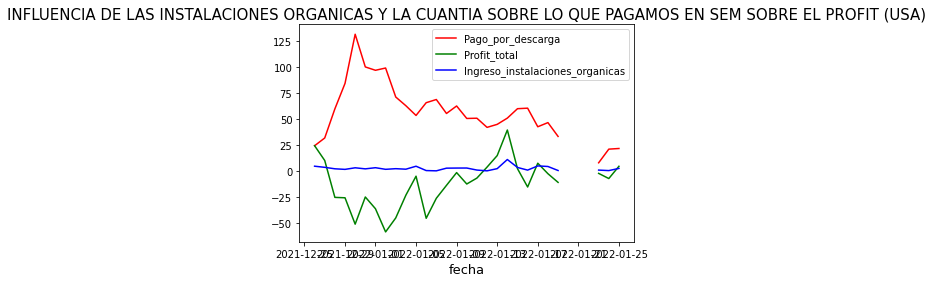

In [19]:
pago_por_descarga=usa["pago_por_descarga"]
Profit_total=usa["Profit_total"]
ingreso_instalaciones_organicas=usa["ingreso_instalaciones_organicas"]
ingreso_instalaciones_organicas=usa["ingreso_instalaciones_organicas"]
data=usa["Date"]
plt.plot(data, pago_por_descarga, label="Pago_por_descarga",color="r")
plt.plot(data, Profit_total, label="Profit_total",color="g")
plt.plot(data, ingreso_instalaciones_organicas, label="Ingreso_instalaciones_organicas",color="b")
plt.legend()
plt.title("INFLUENCIA DE LAS INSTALACIONES ORGANICAS Y LA CUANTIA SOBRE LO QUE PAGAMOS EN SEM SOBRE EL PROFIT (USA)",fontsize=15)
plt.xlabel("fecha",fontsize=13)
plt.show()